## Car Price Prediction
###  Road Map
- 1. Task
- 2. Data
- 3. Modelling
- 4. Error Measurement
- 5. Training and optimization
- 6. Performance Measurement
- 7. Validation and Testing
- 8. Corrective Measure

### Task
- predict the price of task oon the basis of given features

In [67]:
## loading datset and importing a libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Normalization

In [68]:
df=pd.read_csv("./dataset/train.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [69]:
df.shape

(1000, 12)

### Data Preparation 

In [ ]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='kde')

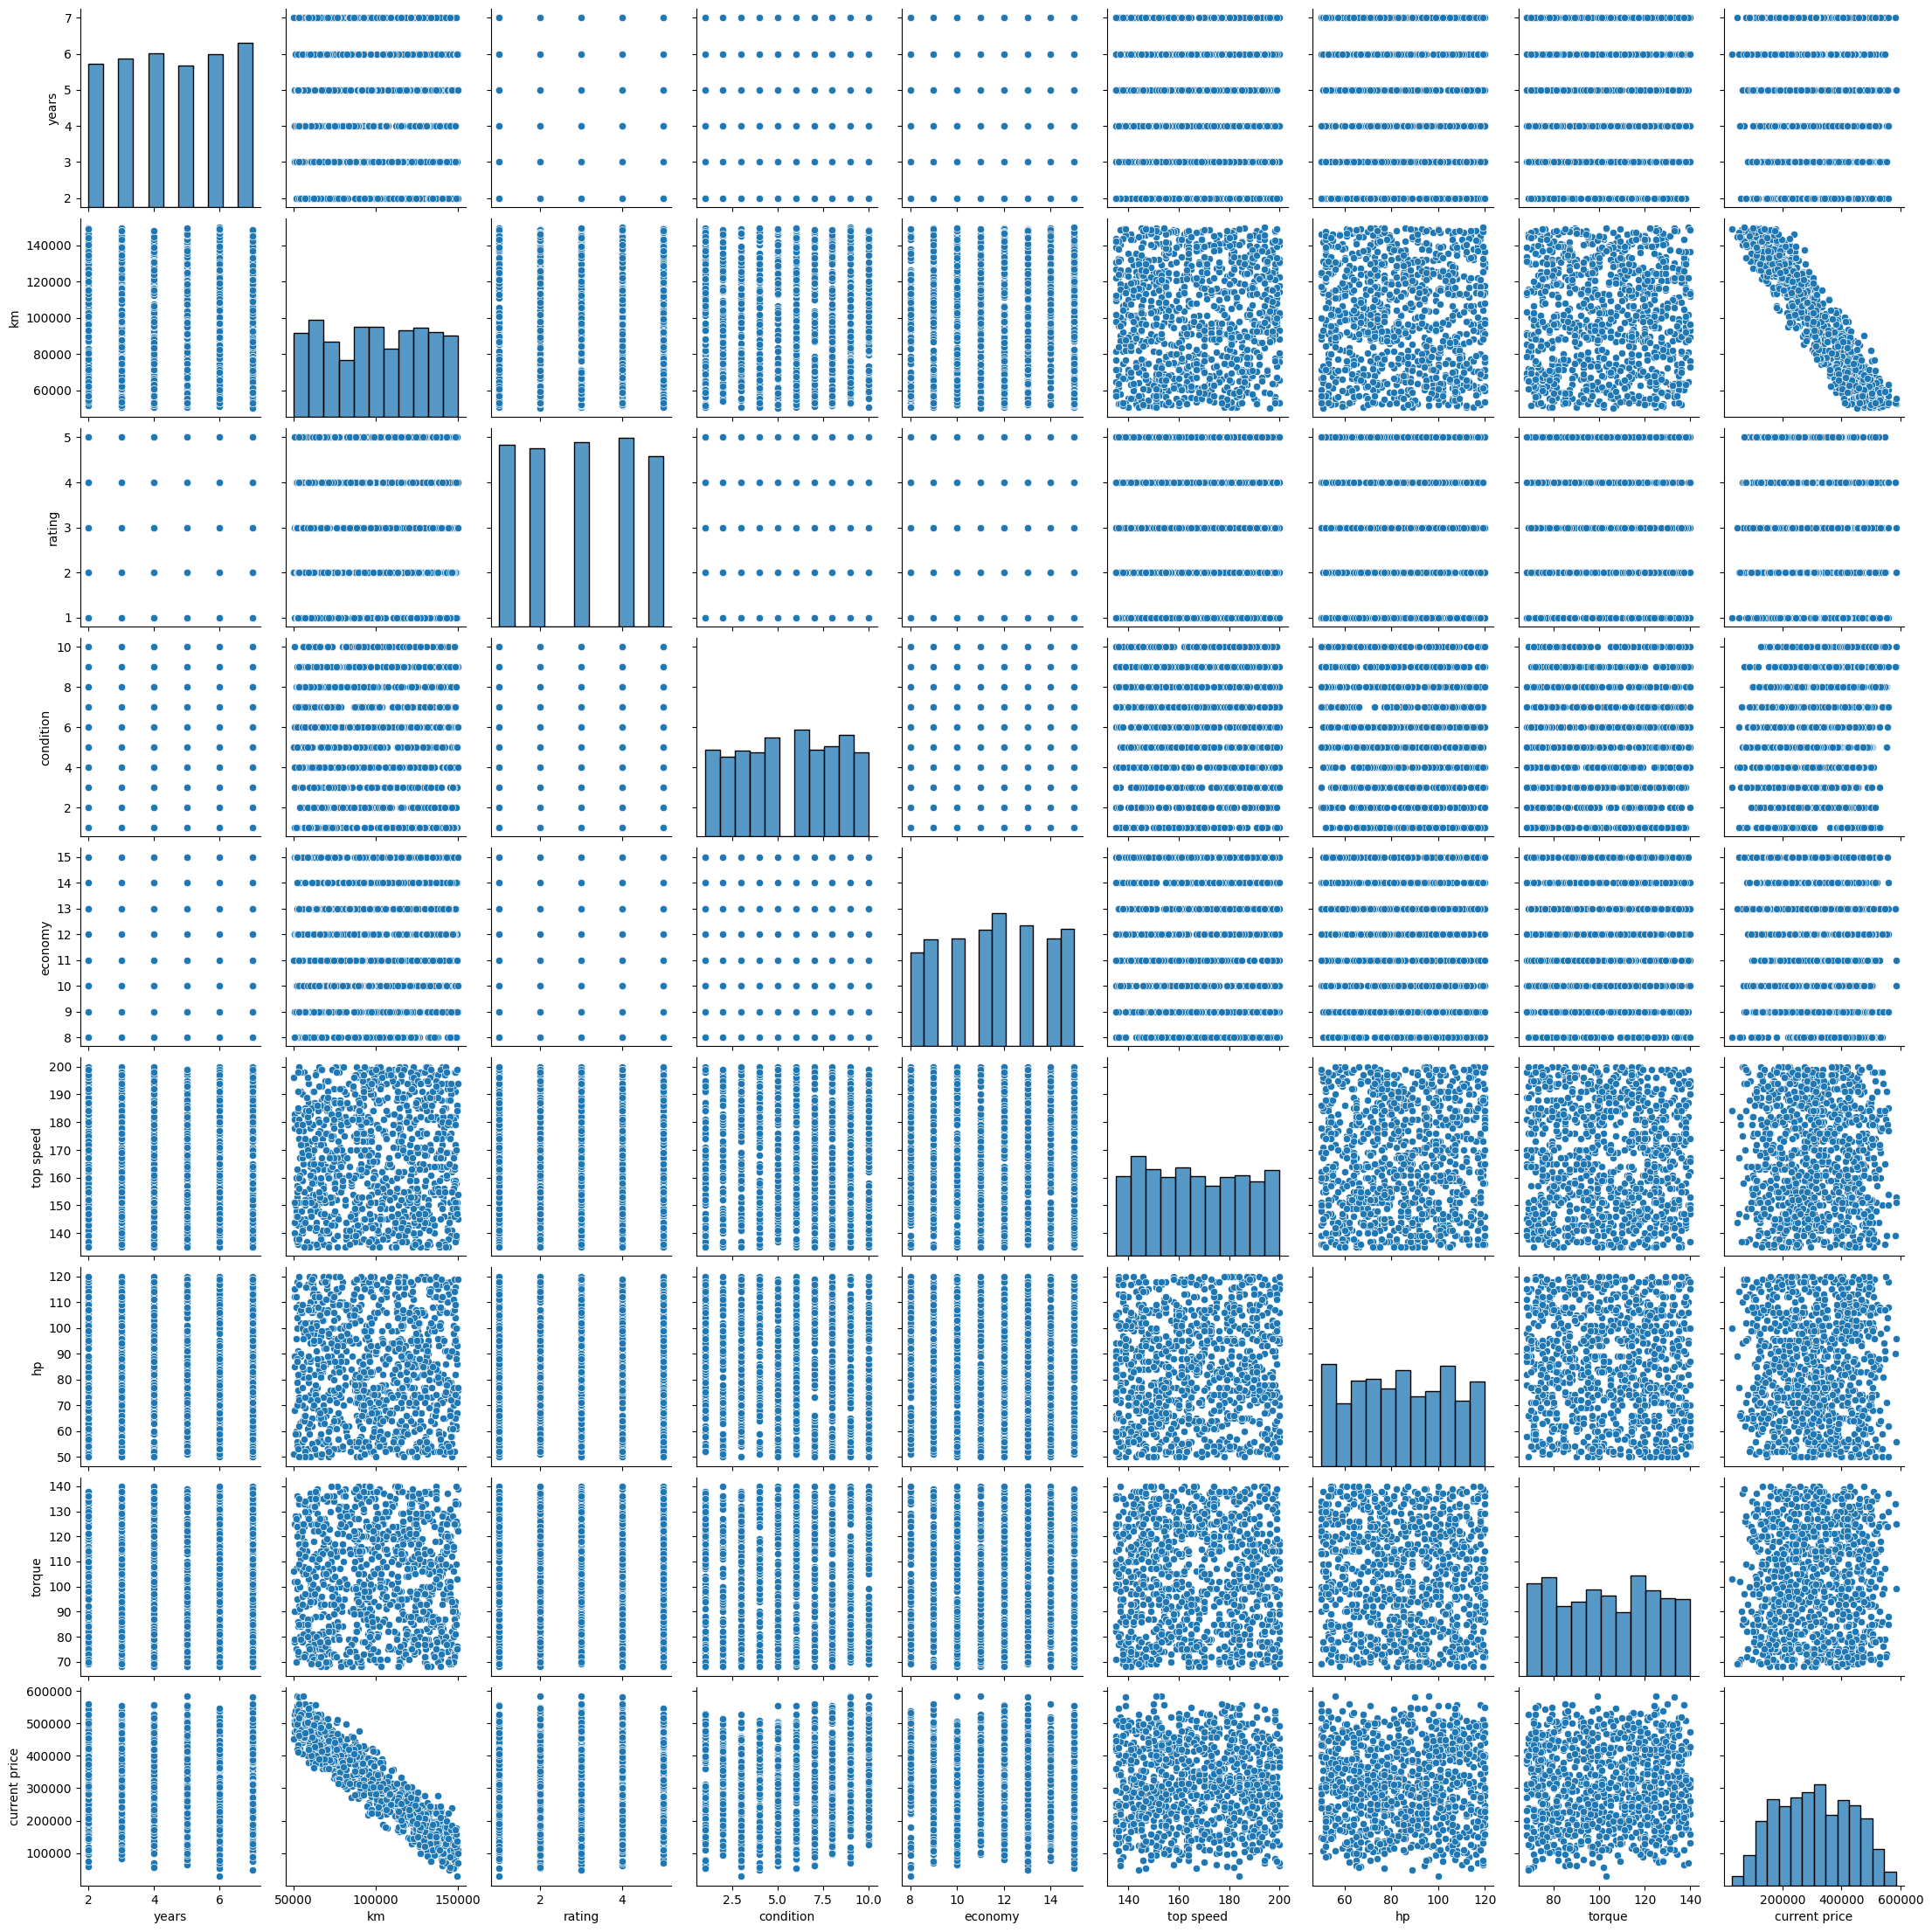

In [ ]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='scatter')

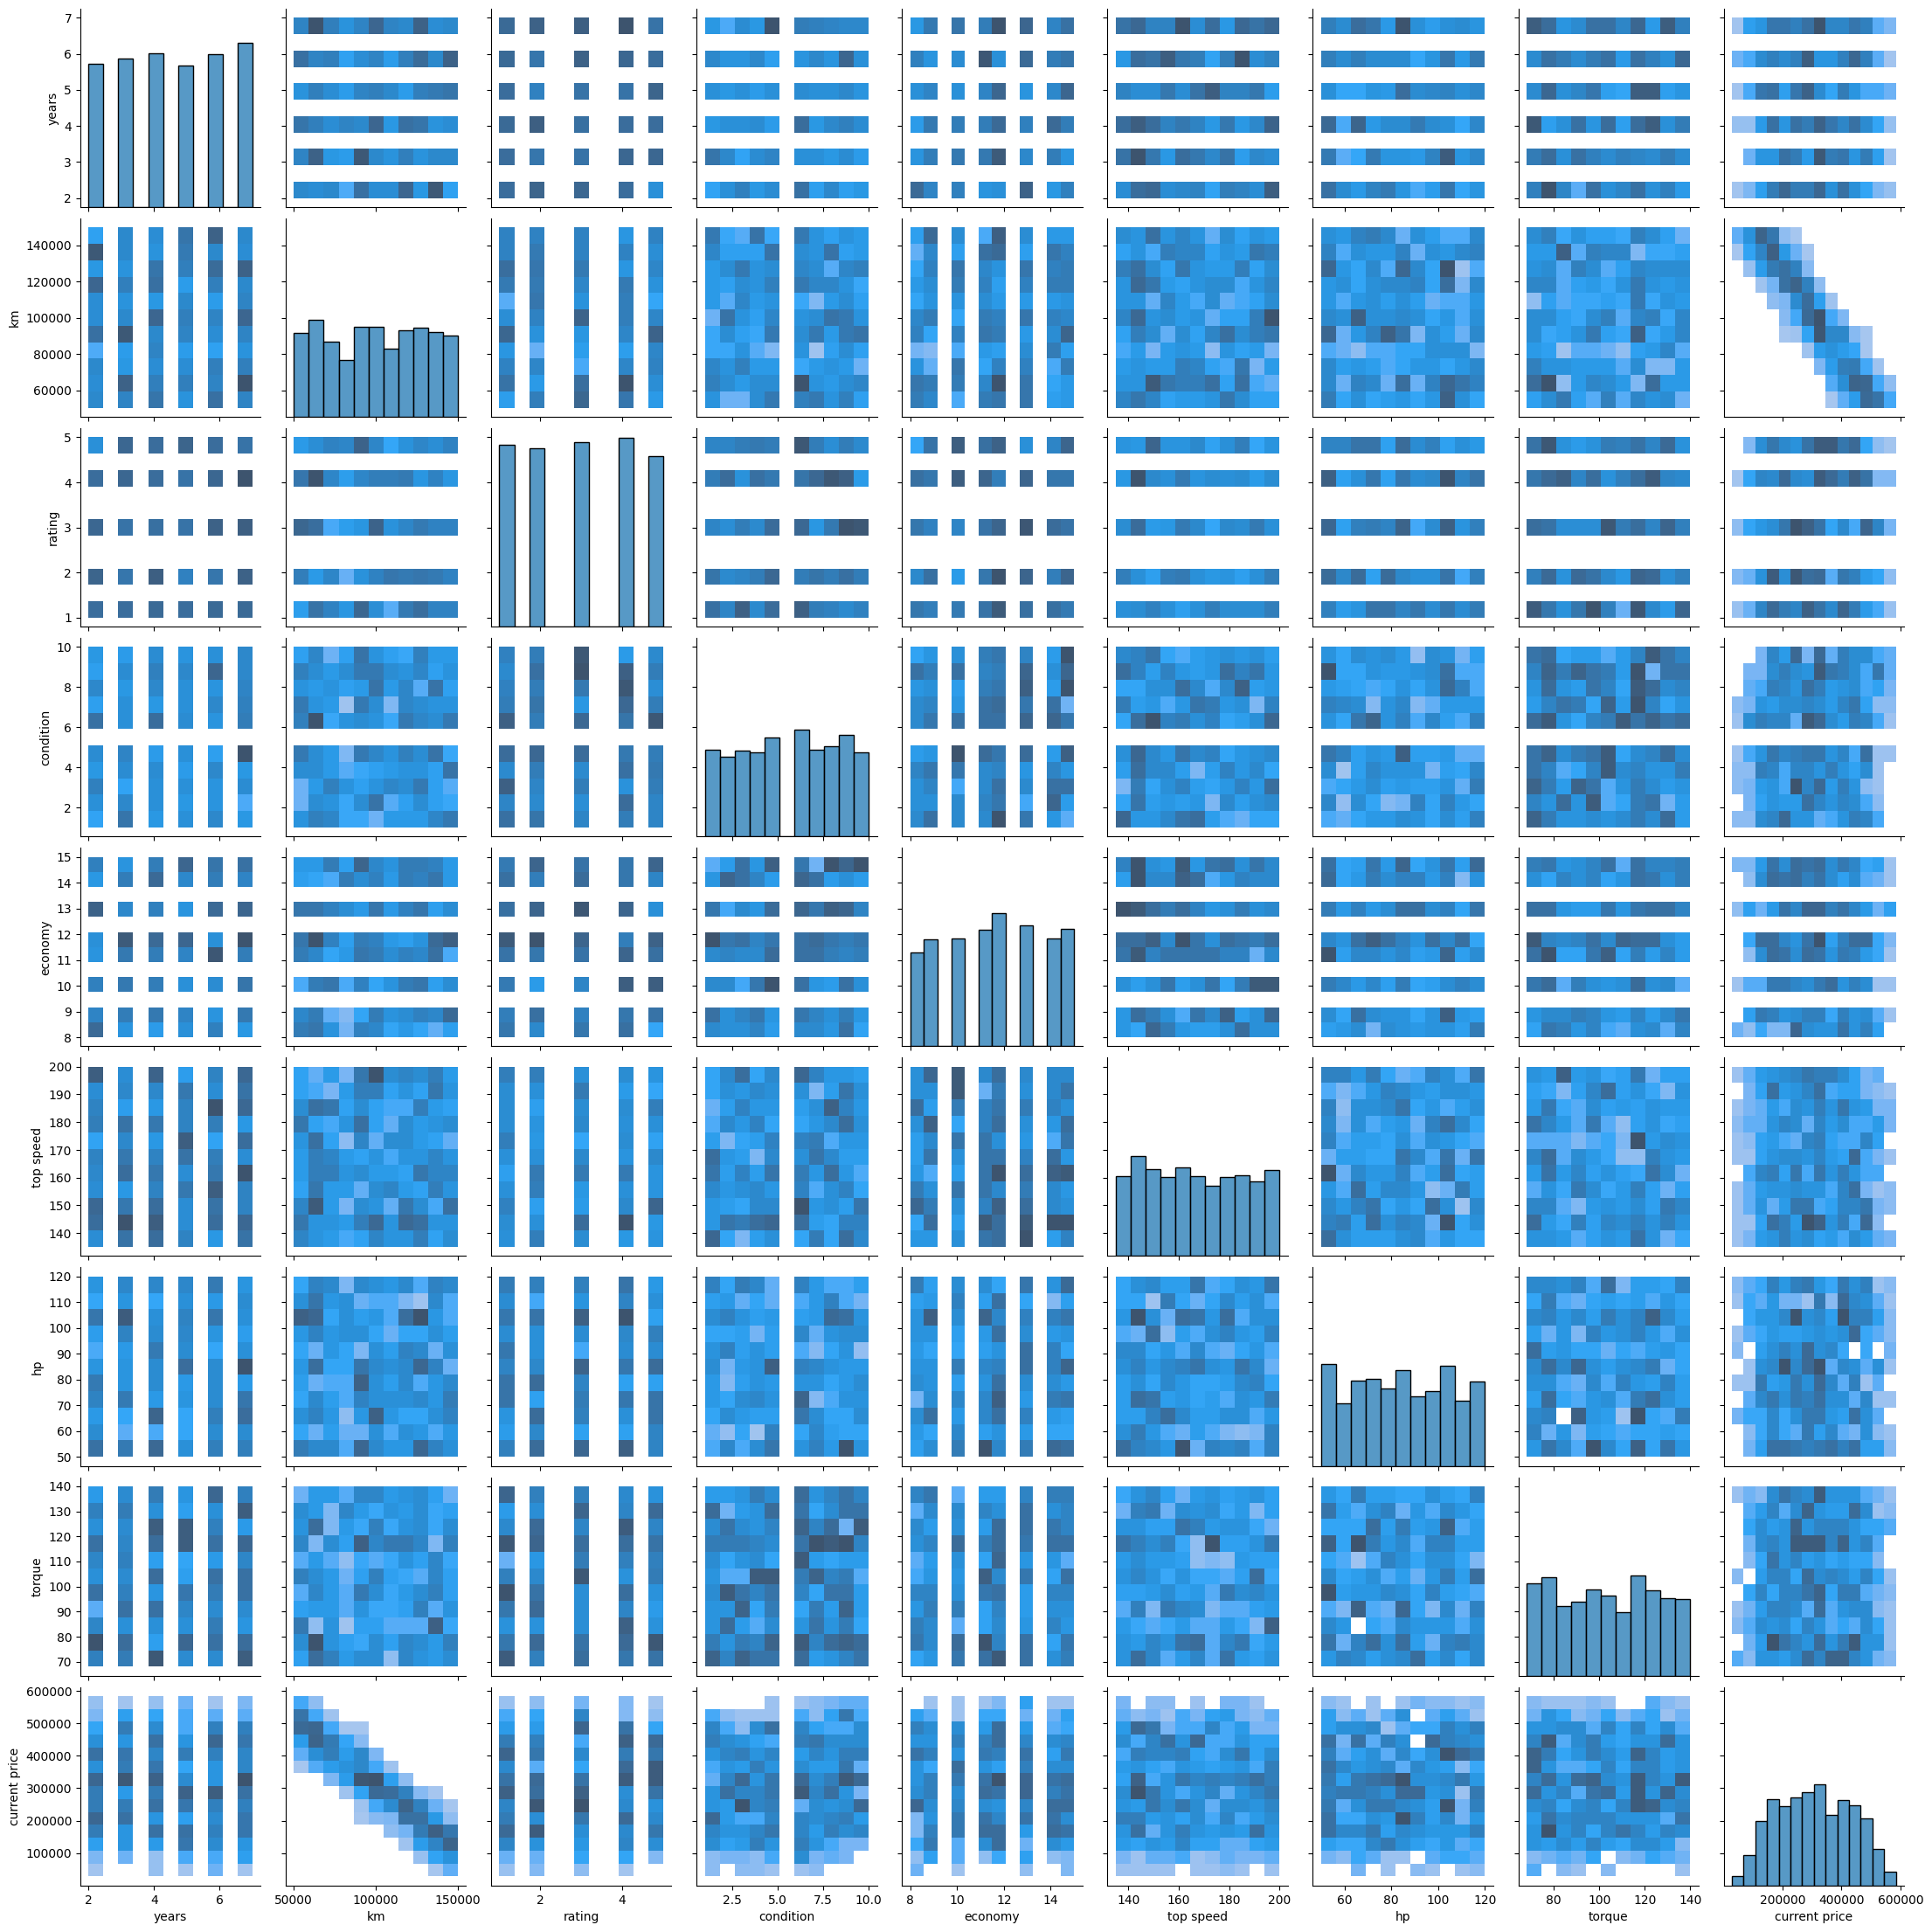

In [ ]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='hist')

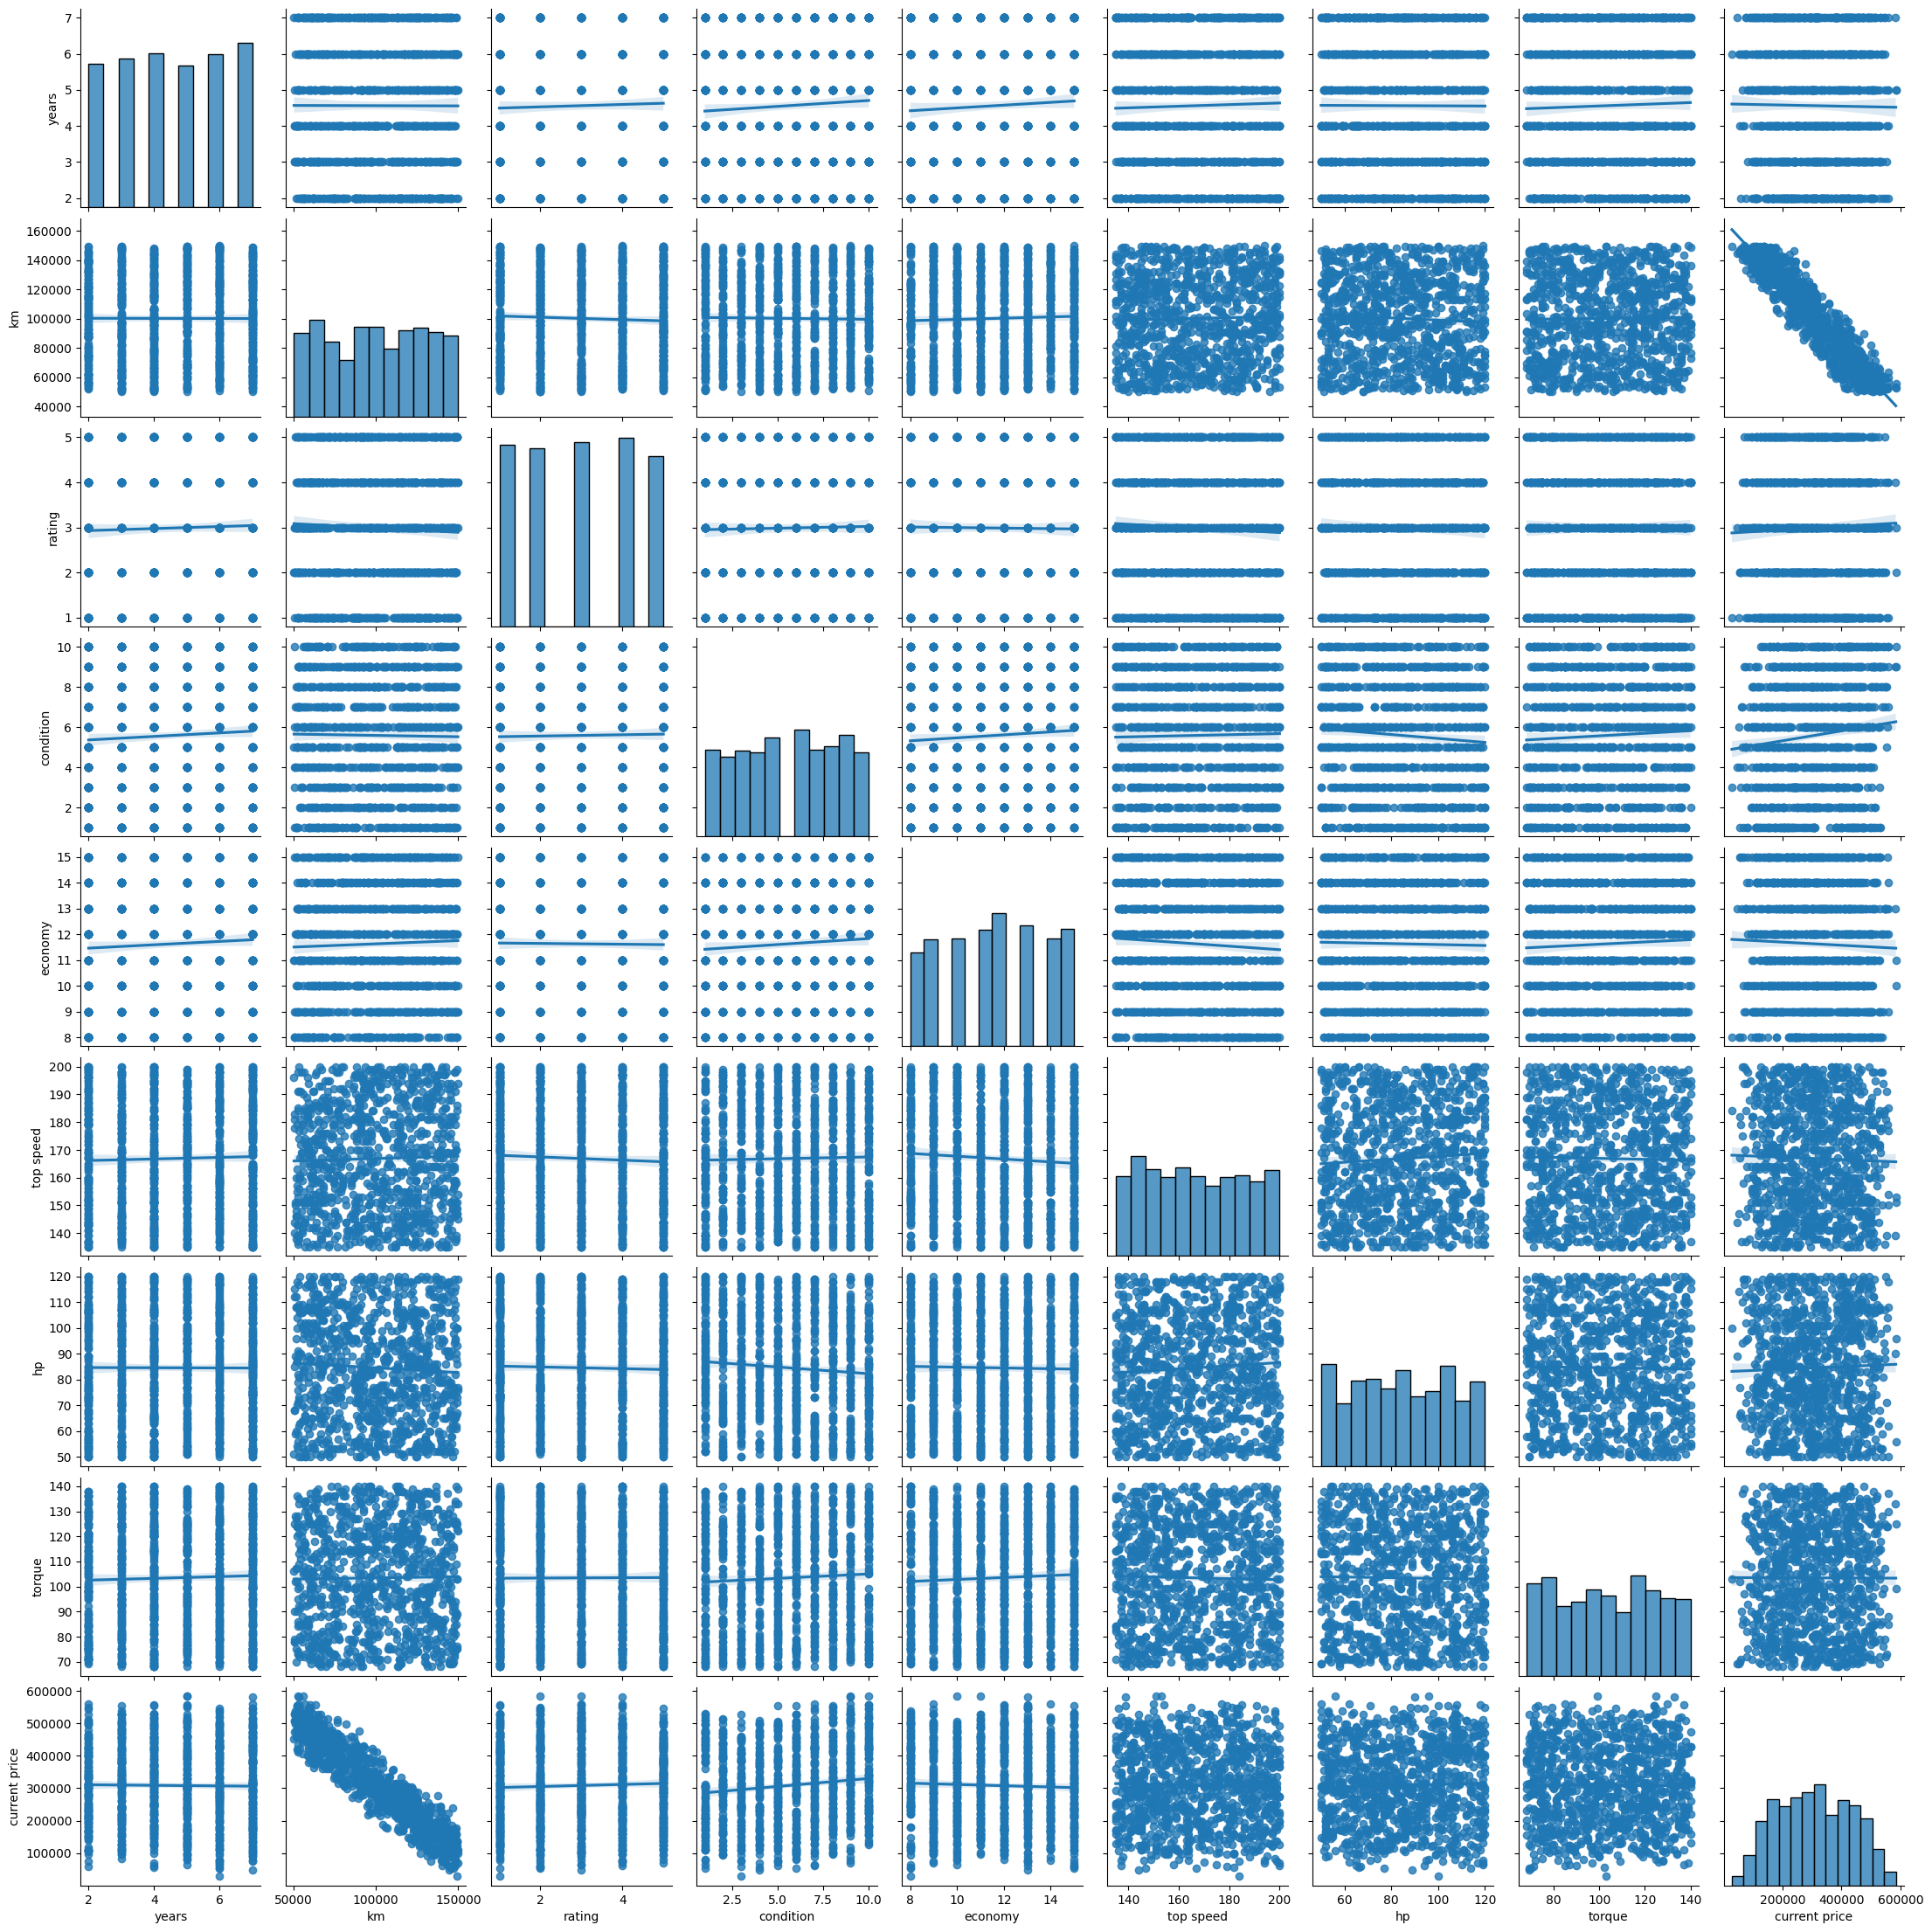

In [ ]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='reg')

In [ ]:
tensorData=tf.constant(df)
tensor_data=tf.cast(tensorData,dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [ ]:
## Do shuffling to make sure there is no bias
tensor_data=tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[6.500000e+01, 6.430340e+05, 8.928140e+05, 5.000000e+00,
        9.468800e+04, 5.000000e+00, 3.000000e+00, 9.000000e+00,
        1.730000e+02, 8.400000e+01, 9.900000e+01, 3.895120e+05],
       [7.510000e+02, 6.716300e+05, 8.458890e+05, 4.000000e+00,
        7.871400e+04, 1.000000e+00, 8.000000e+00, 1.100000e+01,
        1.550000e+02, 9.700000e+01, 1.140000e+02, 4.600195e+05],
       [1.040000e+02, 6.076020e+05, 8.580630e+05, 4.000000e+00,
        9.620600e+04, 5.000000e+00, 4.000000e+00, 8.000000e+00,
        1.940000e+02, 5.300000e+01, 7.100000e+01, 3.497620e+05],
       [2.100000e+01, 5.609760e+05, 7.190030e+05, 7.000000e+00,
        1.305230e+05, 5.000000e+00, 5.000000e+00, 1.000000e+01,
        1.870000e+02, 7.500000e+01, 1.290000e+02, 1.128645e+05],
       [7.300000e+02, 5.633960e+05, 7.931450e+05, 4.000000e+00,
        5.638700e+04, 4.000000e+00, 6.000000e+00, 8.000000e+00,
        1.730000e+02, 6.400000e+01, 1.330000e+02, 4

In [ ]:
df.head(2)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5


In [ ]:
X=tensor_data[:,3:-1]
Y=tensor_data[:,-1]

In [ ]:
print(X.shape)
print(Y.shape)

(1000, 8)
(1000,)


In [ ]:
Y=tf.expand_dims(Y,axis=-1)

## Perform Normalization
The normalized data is then used to train the model. The normalization process is done using the following formula 
(x-meu)/variance      :-standard deviation^2 = variance

In [ ]:
# sample example
normalizer=Normalization()
x_normalizer=tf.constant([2,3,4,5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 3., 4., 5.], dtype=float32)>

In [ ]:
# sample example
normalizer = Normalization(mean=3, variance=2)
x_normalizer = tf.constant([2, 3, 4, 5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.70710677,  0.        ,  0.70710677,  1.4142135 ], dtype=float32)>

In [ ]:
# sample example
normalizer = Normalization(axis=-1, mean=3, variance=2)
x_normalizer = tf.constant([[2, 3, 4, 5],[7,8,9,10]])
normalizer(x_normalizer)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.70710677,  0.        ,  0.70710677,  1.4142135 ],
       [ 2.828427  ,  3.535534  ,  4.242641  ,  4.9497476 ]],
      dtype=float32)>

In [ ]:
## how to do this automatically without providing mean and variance parameters
# Define input tensor
x_normalized = tf.constant([[2, 3, 4, 5], [6, 7, 8, 9]], dtype=tf.float32)

# Adapt normalizer to data
normalizer.adapt(x_normalized)

# Normalize data
normalized_output = normalizer(x_normalized)

print(normalized_output)

tf.Tensor(
[[-1. -1. -1. -1.]
 [ 1.  1.  1.  1.]], shape=(2, 4), dtype=float32)


In [ ]:
# Adapt normalizer to data
normalizer.adapt(X)
normalizer(X)[:5]

NameError: name 'X' is not defined

## Using Linear Regression Model